

```
This assignment involves working with a 200-sample synthetic data to perform
binary classification using a linear model optimized using least squares.

Submit using mycourses dropbox. Save the file in ipynb format.
Your submission will be shared with all your classmates.

You are allowed to research code online or use LLM code generators.

Requirements:

1. Load the data (code provided) and show the shape of the numpy ndarray.
2. Present the data as a pandas dataframe.
3. Show the summary statistics of the dataframe (max, min, mean, etc).
4. Plot the data as a 2-D space comprised of the features, with the samples
   colored by the associated class (3rd column in the numpy array).
5. Find the least squares solution for this data using a single line of code. Do not use np.linalg.lstsq or sklearn.linear_model.LinearRegression. Print the values of your parameter vector beta that includes the bias.
6. Calculate the RSS of the least squares solution.
7. Plot the decision boundary of the linear model optimized by the RSS using a
   decision function that thresholds at 0.5.
8. Color the two prediction regions separated by the decision boundary as blue
   (for predicting as '0') and orange (otherwise).

```



## 1. Import Dataset
As instructed, we will show the shape of the numpy array below.

In [22]:
%%capture

import numpy as np

# to use on windows instead
# !curl --output "../data/binary_classification.npy" "https://github.com/eduardocoelholima/635-code-multiterm/raw/refs/heads/main/data/binary_classification.npy"

In [3]:
data = np.load('../data/binary_classification.npy')
print(data[0,:])

# get shape
print(f"Shape of array: {np.shape(data)}")

[2.52609297 0.32105045 0.        ]
Shape of array: (200, 3)


## 2. Pandas Dataframe

In [4]:
import pandas as pd

df = pd.DataFrame(data)

## 3. Summary Statistics

In [5]:
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.784672,0.756016,0.500000
std,1.297582,1.026442,0.501255
min,-2.520820,-1.999853,0.000000
25%,-0.071465,0.095555,0.000000
50%,0.859702,0.861387,0.500000
75%,1.543438,1.435275,1.000000
max,4.170746,2.855805,1.000000


## 4. Plot Data
Columns 0 and 1 are the values of weights, with column 2 being the associated class. This data can be plotted as such:
- x-axis: Column 0
- y-axis: Column 1
- color: Column 2 (Class)
    - red: 0
    - green: 1

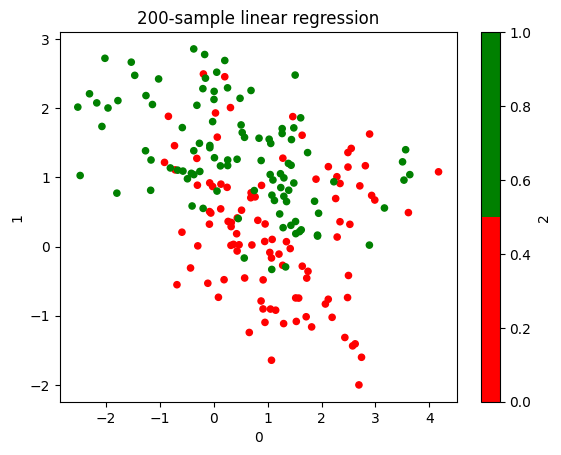

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ["red", "green"]
cmap = ListedColormap(
    colors=colors
)

df.plot(
    kind="scatter",
    x=0, # col 0: x
    y=1, # col 1: y
    c=2, # col 2: class
    colormap=cmap,
)
plt.title(f"{len(df)}-sample linear regression")
plt.show()

## 5. Least Squares Solution
We can find the least squares solution as follows:

$ \hat{\bm{\beta}} = \left( \bm{X}^T\bm{X} \right)^{-1} \bm{X}^T\bm{y} $

In which we find $ \bm{X} $ to take the form
$ \begin{bmatrix}
1 & D_{1,0} & D_{1,1} \\
1 & D_{2,0} & D_{2,1} \\
\vdots & \vdots & \vdots \\
1 & D_{m,0} & D_{m,1} \\
\end{bmatrix}
$
where $ \bm{D} $ is the dataframe represented as a matrix.

$ \bm{y} $ would then be $ D_{:,2} $ and now we can solve for $ \hat{\bm{\beta}} $.


In [56]:
# spread into multiple lines just to keep things cleaner
import numpy as np

# column of 1s and first 2 columns
X = np.hstack((np.ones((data.shape[0], 1)), data[:, :2]))

# y values
y = data[:, 2]

beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Beta (bias term index 0): {beta}")

Beta (bias term index 0): [ 0.3290614  -0.022636    0.24959834]


## 6. Calculate RSS

The Residual Sum of Squares (RSS) for this binary classification example is as simple as just counting the number of mismatches between actual values $ y_i $ and predicted values $ \hat{y_i} $. We can use our model $ \hat{y_i}=x_0 + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 $ with threshold function
$ f(\hat{y_i}) = \begin{cases}
1 & \hat{y_i} \geq 0.5 \\
0 & \hat{y_i} \lt 0.5
\end{cases}
$

In [57]:
# perform X * beta to get y hat values
y_hats = X @ beta

# apply threshold
y_predicted = (y_hats >= 0.5).astype(int)

# calculate RSS
residuals = np.square(y - y_predicted)
rss = np.sum(residuals)

print(f"RSS: {rss}")
# data[0], beta
# 1 * 0.3290614 + 2.52609297 * -0.022636 + 0.32105045 * 0.2495834

RSS: 54.0


## 7. Plot decision boundary

7. Plot the decision boundary of the linear model optimized by the RSS using a
   decision function that thresholds at 0.5.
8. Color the two prediction regions separated by the decision boundary as blue
   (for predicting as '0') and orange (otherwise).

